R0 is 8.0


,suseptible,infected,recovered,day
0,2.000000e+08,1.000000,0.000000e+00,0
1,2.000000e+08,1.548830,7.840433e-02,1
2,2.000000e+08,2.398875,1.998393e-01,2
3,2.000000e+08,3.715451,3.879215e-01,3
4,2.000000e+08,5.754603,6.792290e-01,4
...,...,...,...,...
245,6.727532e+04,745.974803,1.999320e+08,245
246,6.727520e+04,700.896346,1.999320e+08,246
247,6.727508e+04,658.541933,1.999321e+08,247
248,6.727498e+04,618.746951,1.999321e+08,248


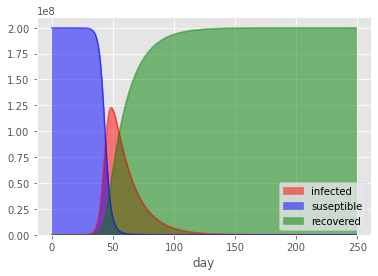

In [57]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# beta is effective contact rate
# gamma is recovery rate

def adjust_rate(contact_rate, day):
    if day > 30:
        return contact_rate
    else:
        return contact_rate

# The SIR model differential equations.
def deriv_adjusted(state, t, N, beta, gamma):
    S, I, R = state
    
    beta = adjust_rate(beta, t)
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# def deriv(state, t, N, beta, gamma):
#     S, I, R = state
#     # Change in S population over time
#     dSdt = -beta * S * I / N        
#     # Change in I population over time
#     dIdt = beta * S * I / N - gamma * I
#     # Change in R population over time
#     dRdt = gamma * I
#     return dSdt, dIdt, dRdt

effective_contact_rate =0.05*10 #0.7   # transmission rate * contact rate  Example ==>[5% transmission and 10 contact a day]
recovery_rate =1/16 #1/3       # 1 / recovery days 

# We'll compute this for fun
print("R0 is", effective_contact_rate / recovery_rate)

# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 200000000
recovered = 0
infected = 1
susceptible = total_pop - infected - recovered

# A list of days, 0-160
days = range(0, 250)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args=(total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T   #.T reverses the order of the axes same as transpose

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'suseptible', 'recovered'],
        color=['red', 'blue', 'green'],
        kind='area',
        stacked=False)

# df = pd.DataFrame({
#     'Suspeced':S,
#     'infected': I,
#     'recovered': R,
#     'day': days
# })

# plt.style.use('ggplot')
# df.plot(x='day',
#         y=['Suspeced','infected','recovered'])

df